In this notebook we talk about some of the functions and methods that are commonly used to deal with numeric and categorical columns in our data in preparation for doing machine learning. Without properly preprocessing the data, our ML algorithm will either fail to execute or execute but return results that are incorrect or incomplete. Since we haven't introduced machine learning yet, it's too early to show examples of how this can happen, but we will see examples in future lectures.

As usual, let's begin by reading some data. We want to read the data and find some ways to summarize the data.

We can see that we have quite a few numeric columns in here. Numeric columns can be **integer**, **float**, or **datetime** columns. However, we also need to be careful: a column like `cylinders` looks numeric, but probably should be treated as a categorical column. Why? Ask yourself which one of these two is more likely:

- do any kind of math with `cylinders`, such as taking the log of it, adding it to another column, or being interested in knowing the average number of cylinders?
- use cylinder as a grouping variable, such as wanting to see the average horsepower **by cylinder**?

We can probably agree that the second case is more likely. For this reason, we need to think of these types of variables as categorical despite them having numeric values.

Let's now look at some distributions for our numeric columns.

None of the features seem to have any extreme values. Let's check for missing values. To see if any columns in the data are missing, we can use the `isnull` method, followed by `any` where the `axis = 0` is used to ask if **any** of values **across columns** is null: `False` means that none is missing, and `True` means that at least one value is missing.

Note that all of this would work only if the missing data is properly marked as null. Often when reading external data sources, other conventions are used to mark data as missing, such as using `-999` for numeric data, or the string `NA` or `?` or the empty string for categorical data. Such values by default would not be picked up by `isnull`. So we would need to first recode them as `np.nan`.

### Exercise (8 minutes)

Let's illustrate the above point with an example, let's intentionally introduce a few missing values in the data, but using characters that won't be recognized as such.

We also can see from the scatter plot matrix that `weight` and `displacement` have a **positive relationship**.  A positive relationship means that as one goes up, so does the other. We may wonder if `cylinders` plays a part.

- Plot the scatter plot between `weight` and `displacement`, color-coded by `cylinders`.

Notice that the result of `describe` itself looks like a `pandas` `DataFrame` or `Series`. That means that if we wanted to extract certain pieces out of it, we should be able to do it using the methods we learned for working with `DataFrame` objects.

- Extract the mean and standard deviation for acceleration from the results above and store them in variables called `acc_mean` and `acc_std`. Then print a statement that states what the mean and standard deviations are.

Now let's see how we can obtain these same summary statistics, but grouped by `cylinders`. There is already one way we know how to do that: we can first subset the data by `cylinders == 3` and run the summary statistics, then do the same for `cylinders == 4`, etc.

But of course the above way is tedious. Instead, we can use the `groupby` method to do it all at once. For example, here's the average of each column grouped by `cylinders`.

The problem with the above table is that there's a lot of information packed in it. Each value of `cylinders` has its own row, which is fine. But the columns look like they have a hierarchical structure, which makes sense because we asked for many summary statistics for each column.

A pandas series is a 1-D collection of scalars.  A typical pandas dataframe is a 2-D collection of scalars.  `results_all` is a multilevel dataframe, which is a 3D collection of scalars.  The 3 Dimensions are:
1. Cylinder Values: [3, 4, 5, 6, 8]
2. Numeric Columns (except Cylinder): [mpg, displacement, weight, acceleration, model, year, origin]
3. Descriptive Statistics:  [count, mean, std, min, 25%, 50%, 75%, max]

So what if for example we wanted to look at the results for `acceleration` only. Turns out we can index the multilevel dataframe the same way we usually do:

The difference with before is that `results_all['acceleration']` isn't just a single column, but is itself a `DataFrame`. That's because `results_all` has hierarchical columns, so its columns are themselves `DataFrame` objects. So if we want to drill further down to a specific column, such as `std`, we need to go one level deeper to get the series for the standard deviations of acceleration by cylinder.  We can even drill down one more level and request the standard deviation of acceleration for 3-cylinder vehicles.

So far it looks like hierarchical columns are not that complicated. However, things do get a little confusing when we want to cross the hierarchy the other way around. For example, let's say we want to quickly compare the standard deviations of all our columns, grouped by `cylinders`. This information is in the above table, but how do we extract it?

It turns out that to do this, we need to use the `IndexSlice` function in `pandas`. Here how it works:
- we use `loc` to say which rows and columns we want
- we use `slice(None)` to say we want everything at a given hierarchy
- if we want to filter at any level of hierarchy, we provide the index we want to filter by

By the way, the same way that we can have hierarchical columns, we can also have hierarchical rows, more specifically hierachical row indexes. Examine the result generated by the cell below. Do you see the hierarchical structure of the row index?

Hierarchical indexes are called `MultiIndex` in `pandas`. This is a more advanced topic and we will leave it at that for now.

- Create `mpg_cat` again, but make the following changes to it: 
  - Note that the choice of using 0 and 100 as the lower and upper bounds is a little arbitrary. So use `-np.Inf` and `np.Inf` instead.
  - By default, cut labels the categories based on the interval range it covers, but we can change the labels to anything we like using the `labels` argument. Rename the labels to `low`, `med` and `high`.

It turns out there are **two kinds of data types for categorical data** in `pandas`: `object` and `category`. By default, any non-numeric column will inherit the `object` type, but we can later convert it to `category` type. An `object` column type can be modified at will, but a `category` type is only appropriate for a column with **a limited number predefined categories**. This is because the `category` type is a more rigid data type with additional limitations on what they can store. So this only makes sense when the categories are known and few. Let's illustrate that by turning some of the columns in our data into `category` columns.

Why would we want to add additional rigidity? Because this way we can impose some amount of **data integrity**. For example, if `marital` should always be limited to "single", "divorced" or "married" then by converting `marital` into a `category` column we can prevent the data from introducing any other category without first adding it as one of the acceptable categories for this column.

- To fix the error, you need to add "widowed" as one of the acceptable categories. Use the `cat.add_categories` method to add "widowed" as a category and then try again to make sure you don't get an error this time.

- Undo your change by reassigning the `marital` column at the second row to the value "single". Get a count of unique values for `marital` now. Do you notice anything? Explain what and why?

Categorical columns have other useful methods, and their names speak for themselves, such as
`as_ordered`, `as_unordered`, `remove_categories`, `remove_unused_categories`, `rename_categories`, `reorder_categories`, and `set_categories`. It is important to be aware of this functionality and use it when it makes sense. Of course an alternative to using these is to convert the column back to `object` and make all the changes we want and then turn it back into `category`, but using the above methods makes the code "cleaner".

So we saw that a `category` column has predefined categories and a set of methods specific to itself for changing the categories, whereas an `object` column is more a type of **free-form** column where any value is acceptable. One way the above distinction matters is when we need to rename the categories for a categorical column. Changing the categories of a categorical column is an example of **recoding** or **remapping**.

- Let's first begin with an example using `job`, which has type `object`. Rename the category "management" to "managerial". HINT: find all rows where `job` is the string `'management'`, and use `loc` to change those rows to the string `'managerial'`.

The above approach works fine, but it's tedious if we have a lot of changes we want to make. The better way to do it is to create a Python dictionary that maps old values (values we want to change) to new values, then use the `replace` method to replace them all at once.

- Create such a dictionary and use `replace` to make the following changes in the `job` column:

  - rename `'student'` to `'in-school'`
  - consolidate `'housemaid'` and `'services'` into a single group called `'catering'`
  - change `unknown` to a missing value, i.e. `np.NaN` (without quotes)

- Get a count of unique values for `job` to make sure everything worked. Note that `value_counts()` does not provide a count for missing values by default. We need to specify `dropna = False` to include missing values in the count.

The `replace` method works equally well with a column of type `category`, however **it changes its type to `object`!** So either we have to convert it back to `category`, or we need to use the `rename_categories` method to replace values, which works very similarly to `replace`. Here's an example:

Categorical columns can also be easily generated from numeric columns. For example, let's say we want to have a column called `high_balance` that is `True` when balance exceeds $2,000 and `False` otherwise. Technically this would be a boolean column, but in practice it acts as a categorical column. Generating such a column is very easy. We refer to such binary columns as **dummy variables** or **flags** because they single out a group.

The process of creating a dummy variable **for each category** of a categorical feature is called **one-hot encoding**. Let's see what happens if we one-hot-encode `marital`.

One-hot encoding is a common enough task that we don't need to do it manually like we did above. Instead we can use `pd.get_dummies` to do it in one go.

There's an even more streamlined way to do one-hot encoding, although at first blush it appears less straight-forward, but there is a reason it is set up this way and we will explain that later. Just like normalization, one-hot-encoding is a common pre-processing task and we can turn to the `sklearn` library to do the hard part for us.

So we can see that one-hot encoding created a **binary feature** for **each category of each categorical column** in the data. Although to be more specific, we limited it to columns whose type is `category` and excluded columns whose type is `object`. This is because one-hot encoding can quickly blow up the number of columns in the data if we are not careful and include categorical columns with lots of categories (also called **high-cardinality** categorical columns). In such cases, we would one-hot encode only the top $n$ categories (what $n$ should be and what "top" should mean depends on the context). Another 

What is the point of doing this? The reason we do this is that most machine learning algorithms do not work **directly** with categorical data, so we need to encode the categorical data which turns it into numeric data. One-hot encoding is just one type of encoding, but it is the most common one.

One last note about the `sklearn` pre-processing transformations we learned about in this notebook: If you look at examples online, you may notice that instead of calling `fit` and `transform` separately, you can call `fit_transform` which combines the two steps into one. This may seem reasonable and saves you one extra line of code, but we discourage it. The following exercise will illustrate why, but the main reason will become clear when we talk about machine learning.

Create new "hybrid" column names for the new one-hot-encoded values.  The column names are a hybrid of the original column name and the column values.

Create a new dataframe out of the one-hot-encoded values and the new column names

Concatenate the new dataframe of the new one-hot-encoded columns to the original bank dataframe and then drop the original `education` and `month` columns

# Assignment (Lesson 05)
# Data Preparation and Feature Selection
Steps in a data science project
1. Acquire data
2. Exploratory Data analysis (EDA)
3. Data Processing
    1. Data Preparation
    2. Feature Selection
4. Predictive Analytics

### Import Packages
Python, like most programming languages, has pre-made software methods.  These pre-made software methods are organized and combined by topic into packages.  The packages that we want are:
- numpy (numerical python)
- pandas (panel data aka tables)
- sklearn (sci-kit learn for predictive analytics)
- matplotlib (data plotting for matrix-like data)  

We need to "import" these packages so that we can use their methods in our code.

In [5]:
# import packages
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
# Allow inline plotting in Jupyter Notebook
%matplotlib inline

## Data Preparation on the Mammographic Masses Dataset (Mamm)
### Acquire data
We will get our data from the University of California, Irvine Machine Learning Repository.  Our dataset was used to determine the effectiveness of radiological evaluations of breast cancer diagnoses in women who have breast tumors.  You can get some information on the data from here:  http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.names

In [2]:
# csv file:
url = "../data/mammographic_masses.data"
# Alternate data source:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data"

# Download the data
Mamm = pd.read_csv(url, header=None)

# Replace the default column names (0, 1, 2, 3, 4, 5) with meaningful names
Mamm.columns = ["BI_RADS", "Age", "Shape", "Margin", "Density", "Severity"]

Mamm.head()

,BI_RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


### Some preliminary EDA:
"BI_RADS", and "Density" are ordinal columns.  We will assume that they are numeric.  
"Age" and "Severity" are numeric columns.    
"Shape" and "Margin" are category columns but they are encoded as integers.  

Show the actual data types of these columns.  Can you guess why the data types of these 5 columns are `object`?

<span style="color:red" float:right>[0 point]</span>

In [3]:
# Add code here
Mamm.dtypes

BI_RADS     object
Age         object
Shape       object
Margin      object
Density     object
Severity     int64
dtype: object

Why the data types of these 5 columns are object? Even though they all look numeric, their types not integers indicate that there might be missing values, NA values or symbols that are considered string. 

### Some Data Processing
In the following sections you will do the following to the Mamm dataframe:
- Replace unusable entries with null/nan  
- Change types of data.
- Correct unexpected values (outliers)
- decode category data    
- Consolidate categories in category data 

#### Replace Missing Values with Nulls
Coerce all columns, even category columns, that contain missing values to numeric data using `pd.to_numeric`.  You might get an error, like `Unable to parse string`.  You need to tell `pd.to_numeric` that it should **coerce** the casting when it encounters a value that it cannot parse.  The category columns in this dataset are encoded as integers.  We will make use of that encoding.  Any non-numeric value will be replaced with a nan and you will get nans for missing numeric and category values.  After you replace all the non-numeric values, present the first five rows with `Mamm.head()`.

<span style="color:red" float:right>[1 point]</span>

In [4]:
# Coerce all the data to numeric data
# Coercion will introduce nans/nulls for the non-numeric values in all columns
# Because the categories are encoded as integers, the missing categories will also be nans/nulls after coercion.
# Add code here

# Coerce all columns to numeric
for col in Mamm.columns:
    Mamm[col] = pd.to_numeric(Mamm[col], errors='coerce')

print(Mamm.head())
print(Mamm.dtypes)

   BI_RADS   Age  Shape  Margin  Density  Severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1
BI_RADS     float64
Age         float64
Shape       float64
Margin      float64
Density     float64
Severity      int64
dtype: object


#### Replace Outliers
Values that are obviously incorrect are often replaced with averages.  Often, outlier replacements with averages are inappropriate because the extreme values have some meaning.  For instance, from the data dictionary we know that BI_RADS should range from 1 to 5.  BI_RADS values beyond 1 and 5 were added by physicians who did not adhere to the accepted range.  In this case, BI_RADS greater than 5 should be "clipped" at 5 and BI_RADS less than 1 should be "clipped" at 1. 

<span style="color:red" float:right>[1 point]</span>

In [5]:
# Cap BI_RADS values to a range of 1 to 5
# Add code here

# use Clip, it clips any values greater than 5 to 5 and any value lower than 1 to 1
Mamm['BI_RADS'] = Mamm['BI_RADS'].clip(lower=1, upper=5)



### Consolidate and decode category columns

Decoding a category is when categories are coded as numbers and we replace those numbers with actual categories.  
Consolidating (aka binning or grouping) of categories means that multiple categories are renamed to a single category.  
The decoding and consolidating of categories can occur at the same time.  

- Shape
 - The original category codes are: round=1; oval=2; lobular=3; irregular=4;  
 - The proper consolidated category decoding is: 1 $\rightarrow$ oval; 2 $\rightarrow$ oval; 3 $\rightarrow$ lobular; 4 $\rightarrow$ irregular;  
- Margin
 - The original category codes are: circumscribed=1; microlobulated=2; obscured=3; ill-defined=4; spiculated=5  
 - The proper consolidated category decodes are: 1 $\rightarrow$ circumscribed; 2 $\rightarrow$ ill-defined; 3 $\rightarrow$ ill-defined; 4 $\rightarrow$ ill-defined; 5 $\rightarrow$ spiculated;

After you decode and consolidate, present the first five rows with `Mamm.head()`. 

<span style="color:red" float:right>[1 point]</span>

In [6]:
# The category columns are decoded and categories are consolidated

# The Shape variable is decoded as follows:  1 and 2 to oval;  3 to lobular; 4 to irregular
# Add code here
# Define the Shape mapping
shape_mapping = {
    1.0 : 'oval',
    2.0 : 'oval',
    3.0 : 'lobular',
    4.0 : 'irregular'
}
    
# Apply the mapping
Mamm['Shape'] = Mamm['Shape'].map(shape_mapping)

# The Margin variable is decoded as follows:  1 to circumscribed;  2, 3, 4 to ill_defined; 5 to spiculated
# Add code here
# Define the Margin mapping
margin_mapping = {
    1.0 : 'circumscribed',
    2.0 : 'ill_defined',
    3.0 : 'ill_defined',
    4.0 : 'ill_defined',
    5.0 : 'spiculated'
}

# Apply the mapping
Mamm['Margin'] = Mamm['Margin'].map(margin_mapping)

# Present the first few rows
# Add code here
Mamm.head()

,BI_RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,lobular,spiculated,3.0,1
1,4.0,43.0,oval,circumscribed,NaN,1
2,5.0,58.0,irregular,spiculated,3.0,1
3,4.0,28.0,oval,circumscribed,3.0,0
4,5.0,74.0,oval,spiculated,NaN,1


### Some More EDA
- Show the shape of the dataframe
- Use the `pandas` `isna` method to show the distribution of nulls among the columns.
  
<span style="color:red" float:right>[0 point]</span>

(961, 6)
BI_RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64


<Axes: xlabel='None'>

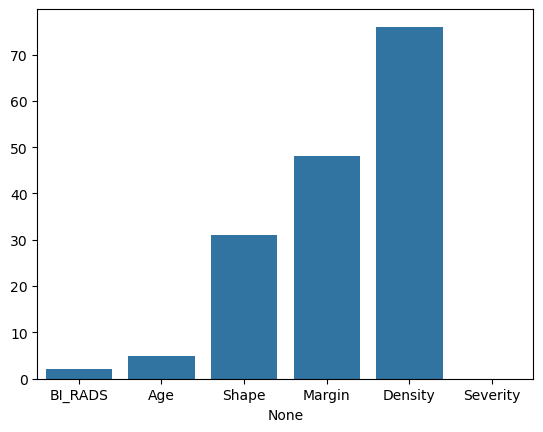

In [7]:
# Show the shape of the data frame
# Add code here
print(Mamm.shape)
# Show the distribution of nulls among the columns
# Add code here
null_counts = Mamm.isna().sum()
print(null_counts)
# Show distribution in a bar chart
import seaborn as sns
sns.barplot(x=null_counts.index, y=null_counts.values)

### Drop Rows with Multiple Missing Values
When a row has too many missing values, then it should not be used.  We can stipulate a threshold requirement of available values per row.  We will require that each row contains at least 5 values.  This requirement means that no row is allowed more than 1 missing value.  
Remove the rows that have more than one missing value.  
- Use the `pandas` `dropna` method and set the `thresh` argument.  
- Show the shape of the dataframe after you drop the rows with multiple nulls. 
- Use the `pandas` `isna` method to show the number of nulls per column after dropping rows with multiple nulls

<span style="color:red" float:right>[1 point]</span>

In [8]:
# Drop rows
# Add code here
# thresh = N requires at least N non-null values to keep the row/column
# axis = 0 is default, drop rows
# set inplace = True to modify Mamm
Mamm.dropna(axis=0, thresh=5, inplace = True)

# Show the shape of the data frame
# Add code here
print(Mamm.shape)

# Show the distribution of nulls among the columns
# Add code here
print(Mamm.isna().sum())

(931, 6)
BI_RADS      1
Age          5
Shape       17
Margin      22
Density     56
Severity     0
dtype: int64


## Impute Missing Values
Use the median values to impute missing values for true numerical columns (`Age`, `BI_RADS`, `Density`).  `Margin` and `Shape` originally looked numeric, but they are categorical.  Therefore, do not use median on `Margin` and `Shape`.  

### Determine the imputation values for Age

In [9]:
# Replace missing age values with the median 
MedianAge = np.nanmedian(Mamm.loc[:,"Age"])
HasNanAge = pd.isnull(Mamm.loc[:,"Age"])
print('Now we replace', HasNanAge.sum(),'missing age values with the age median (', MedianAge, ')')
Mamm.loc[HasNanAge, "Age"] = MedianAge
Mamm.isna().sum(axis=0)

Now we replace 5 missing age values with the age median ( 57.0 )


BI_RADS      1
Age          0
Shape       17
Margin      22
Density     56
Severity     0
dtype: int64

### Impute Missing values for BI_RADS and Density
Assign the column medians to the null values in the respective numeric columns.
- Use the `pandas` `isnull` method to identify the nulls
- Use the `numpy` `nanmedian` to determine the median for imputation
- Use the `pandas` `isna` method to show the number of nulls per column after the imputation   
  
<span style="color:red" float:right>[1 point]</span>

In [11]:
# Median Imputation for BI_RADS
# Add code here
MedianBI = np.nanmedian(Mamm.loc[:, "BI_RADS"])
HasNanBI = pd.isnull(Mamm.loc[:, "BI_RADS"])
print('Now we replace', HasNanBI.sum(), 'missing BI_RADS values with the BI_RADS median(', MedianBI,')')
Mamm.loc[HasNanBI, "BI_RADS"] = MedianBI

# Median Imputation for Density
# Add code here
MedianDensity = np.nanmedian(Mamm.loc[:, "Density"])
HasNanDensity = pd.isnull(Mamm.loc[:, "Density"])
print('Now we replace', HasNanDensity.sum(), 'missing Density values with the Density median(', MedianDensity,')')
Mamm.loc[HasNanDensity, "Density"] = MedianDensity

# Distribution of nulls
# Add code here
Mamm.isna().sum(axis=0)

Now we replace 0 missing BI_RADS values with the BI_RADS median( 4.0 )
Now we replace 0 missing Density values with the Density median( 3.0 )


BI_RADS      0
Age          0
Shape       17
Margin      22
Density      0
Severity     0
dtype: int64

### Replace missing values for the two categorical columns
- Use `pandas` `value_counts()` method to determine the distribution of categories in `Shape` and `Margin` before imputation.
- Use the `pandas` `isnull()` method to identify the missing values
- Assign the most common value to the null values in the respective categorical columns. 
- After the imputation, use the `pandas` `isna` method to show the number of nulls after the imputation.
- Use the `pandas` `value_counts()` method to determine the distribution of categories after imputation.

<span style="color:red" float:right>[1 point]</span>

In [16]:
# Determine the distribution of categories for Shape
# Add code here
Mamm['Shape'].value_counts()
# the most common is oval, it appears 442 times

# Replace nulls in Shape with the most common category of Shape
# Add code here
# We want to find the most common category automatically instead of manually
# Compute the most common category (mode) of Shape
most_common_shape = Mamm['Shape'].mode()[0]
# Identify missing values with isnull() and replace them
Mamm.loc[Mamm['Shape'].isnull(), 'Shape'] = most_common_shape


# Determine the distribution of categories for Margin
# Add code here
Mamm['Margin'].value_counts()

# Replace nulls in Margin with the most common category of Margin
# Add code here
# Compute the most common category (mode) of Margin
most_common_margin = Mamm['Margin'].mode()[0]
# Identify missing values with isnull() and replace them
Mamm.loc[Mamm['Margin'].isnull(), 'Margin'] = most_common_margin

# Distribution of nulls
# Add code here
print(Mamm.isna().sum(axis=0))

# Determine the distribution of categories
# Add code here
print(Mamm.value_counts())

BI_RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64
BI_RADS  Age   Shape      Margin         Density  Severity
5.0      66.0  irregular  ill_defined    3.0      1           11
4.0      45.0  oval       circumscribed  3.0      0           10
         59.0  oval       circumscribed  3.0      0            9
         56.0  oval       circumscribed  3.0      0            9
         63.0  oval       circumscribed  3.0      0            8
                                                              ..
         58.0  irregular  spiculated     3.0      0            1
         57.0  oval       spiculated     3.0      0            1
                          ill_defined    1.0      0            1
                          circumscribed  2.0      0            1
5.0      96.0  lobular    ill_defined    3.0      1            1
Name: count, Length: 524, dtype: int64


### One hot encode the categorical variables
- Use `OneHotEncoder` from `sklearn.preprocessing` to one-hot encode the two categorical variables, `Shape` and `Margin`.
- Make sure that the new columns have descriptive hybrid names by using the `get_feature_names_out` method.
- Add the new binary columns to the dataframe.
- drop the original columns, `Shape` and `Margin`
- Show the first few rows of the dataframe.

<span style="color:red" float:right>[3 point]</span>

In [22]:
# get package
# Add code here
from sklearn.preprocessing import OneHotEncoder

# One-hot-encode
# Add code here
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Create Column Names
# Add code here
Mamm_cat = Mamm[['Shape', 'Margin']].copy()

# Add one-hot-encoded columns to dataframe
# Add code here
onehot.fit(Mamm_cat)
col_names = onehot.get_feature_names_out(Mamm_cat.columns)
Mamm_onehot =  pd.DataFrame(onehot.transform(Mamm_cat), columns = col_names)

Mamm_onehot.head()

# Add the encoded columns to the original DataFrame

# Create DataFrame from encoded results
Mamm_onehot = pd.DataFrame(onehot.transform(Mamm_cat), columns=col_names, index=Mamm.index)

# Add new columns to the original dataframe
Mamm = pd.concat([Mamm, Mamm_onehot], axis=1)


# Drop original categorical columns
# Add code here
Mamm.drop(columns=['Shape', 'Margin'], inplace=True)

# Show the first few rows
# Add code here
print(Mamm.head())

   BI_RADS   Age  Density  Severity  Shape_irregular  Shape_lobular  \
0      5.0  67.0      3.0         1              0.0            1.0   
1      4.0  43.0      3.0         1              0.0            0.0   
2      5.0  58.0      3.0         1              1.0            0.0   
3      4.0  28.0      3.0         0              0.0            0.0   
4      5.0  74.0      3.0         1              0.0            0.0   

   Shape_oval  Margin_circumscribed  Margin_ill_defined  Margin_spiculated  
0         0.0                   0.0                 0.0                1.0  
1         1.0                   1.0                 0.0                0.0  
2         0.0                   0.0                 0.0                1.0  
3         1.0                   1.0                 0.0                0.0  
4         1.0                   0.0                 0.0                1.0  


## End of Data Preparation on the Mammographic Masses Dataset (Mamm)



## Feature Selection on the Indian  Liver Patient Dataset (ILPD)
Feature selection is a process of removing features that are redundant and that could lead to overfitting, singular matrices, and other problems associated with high cardinality (Curse of dimensionality:  https://en.wikipedia.org/wiki/Curse_of_dimensionality)

### Acquire Data

We will get our data from the University of California, Irvine Machine Learning Repository. Our dataset was used to determine if blood test data could be sufficient to identify liver disease in rural areas with few physicians.

In [8]:
# csv file:
url = "../data/Indian Liver Patient Dataset (ILPD).csv"
# Alternate data source:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian Liver Patient Dataset (ILPD).csv"
url = url.replace(" ", "%20")

# Download the data
ILPD = pd.read_csv(url, header=None)

# Replace the default column names (0, 1, 2, 3, 4, 5) with meaningful names
ILPD.columns = ["Age","Gender","DB","TB","Alkphos","Sgpt","Sgot","TPr","ALB","AGRatio","Selector"]

ILPD

,Age,Gender,DB,TB,Alkphos,Sgpt,Sgot,TPr,ALB,AGRatio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Data Preparation for ILPD
- All columns should be numeric and continuous
    - Remove binary columns (numeric and categorical) because their mutual information scores will be lower
    - Remove any categorical columns
- Remove or impute any missing values

<span style="color:red" float:right>[1 point]</span>

In [9]:
# Drop Binary Columns
# Add Code here
binary_cols = [col for col in ILPD.columns if ILPD[col].nunique() == 2]
ILPD.drop(columns=binary_cols, inplace=True)

# Impute values or remove rows with nulls
# Add Code here
ILPD.dropna(inplace = True)
# Check
ILPD.isnull().sum()

Age        0
DB         0
TB         0
Alkphos    0
Sgpt       0
Sgot       0
TPr        0
ALB        0
AGRatio    0
dtype: int64

### Mutual Information
https://en.wikipedia.org/wiki/Mutual_information
Below is a wrapper for determining the mutual information between two continuous (numeric) variables

In [10]:
from sklearn.metrics import mutual_info_score
# x is the first input variable
# y is the second input variable
# bins is the number of discretized values that will be used for the two input variables
def calc_MI(x, y, bins=80):
    if (bins > 1):
        c_xy = np.histogram2d(x, y, bins)[0]
        mi = mutual_info_score(None, None, contingency = c_xy)
    else:
        mi = mutual_info_score(x, y)
    return mi

### Create method to list  all column pairs together with their mutual information score
Write a method called `listMutualInformationScores`.  It uses the above method (`calc_MI`) in a loop to find the mutual information between all possible pairs of columns in the data.  The input to the function is the dataframe of continuous variables, specifically the prepared ILPD dataset.  

The method returns a list of lists.  Each inner list contains three items:  the x-column, the y-column, and the mutual information score. The list of lists contains every possible pair of columns in the data.  The result should have a form similar to the following, except that the outer list is much longer and contains all possible column pairs:  
`[['Alkphos', 'Sgot', 0.33],
['Sgot', 'AGRatio', 0.23],
['Age', 'Sgot', 0.35],
['Sgpt', 'AGRatio', 0.30],
['Sgot', 'ALB', 0.29],
['Sgot', 'TPr', 0.33]]`

<span style="color:red" float:right>[3 point]</span>

In [19]:
# define the method listMutualInformationScores
# Add code here
import numpy as np

def listMutualInformationScores(df, bins=80):
    cols = df.columns
    n = len(cols)
    mi_list = []

    # Loop over all pairs of columns
    for i in range(n):
        for j in range(n):
            if i == j:
                continue # skip self-pairs
            else:
                x_col = cols[i]
                y_col = cols[j]
                x = df[x_col].values
                y = df[y_col].values
                mi_score = calc_MI(x, y, bins=bins)
                mi_list.append([x_col, y_col, mi_score])
    
    return mi_list
    

In [20]:
# Run the method listMutualInformationScores
# Add code here
mi_list = listMutualInformationScores(ILPD)
print(mi_list)

[['Age', 'DB', 0.5644787143666757], ['Age', 'TB', 0.7514234850047589], ['Age', 'Alkphos', 0.9196545088882098], ['Age', 'Sgpt', 0.4808423247740837], ['Age', 'Sgot', 0.3505680254120972], ['Age', 'TPr', 1.4594265122929932], ['Age', 'ALB', 1.239534520060146], ['Age', 'AGRatio', 0.9686971600496507], ['DB', 'Age', 0.5644787143666758], ['DB', 'TB', 1.4104581235897866], ['DB', 'Alkphos', 0.5183697490698292], ['DB', 'Sgpt', 0.40584367452336506], ['DB', 'Sgot', 0.3516337498838571], ['DB', 'TPr', 0.5428559214354709], ['DB', 'ALB', 0.4743600673883378], ['DB', 'AGRatio', 0.4466792723810326], ['TB', 'Age', 0.751423485004759], ['TB', 'DB', 1.4104581235897866], ['TB', 'Alkphos', 0.6349440492058065], ['TB', 'Sgpt', 0.47350718962958405], ['TB', 'Sgot', 0.4168223051422658], ['TB', 'TPr', 0.7472228555296957], ['TB', 'ALB', 0.62702643168737], ['TB', 'AGRatio', 0.5815428844636297], ['Alkphos', 'Age', 0.91965450888821], ['Alkphos', 'DB', 0.5183697490698291], ['Alkphos', 'TB', 0.6349440492058065], ['Alkphos',

In [27]:
# try with matrix
# define the method MatrixMutualInformationScores
# Add code here
# import numpy as np

def MatrixMutualInformationScores(df, bins=80):
    cols = df.columns
    n = len(cols)

    # Create an empty DataFrame to store MI scores
    mi_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)

    # Loop over all pairs of columns
    for i in range(n):
        for j in range(n):
            x = df[cols[i]].values
            y = df[cols[j]].values
            mi_matrix.iloc[i, j] = calc_MI(x, y, bins=bins)
    
    return mi_matrix

In [28]:
# Run the method MatrixMutualInformationScores
# Add code here
mi_matrix = MatrixMutualInformationScores(ILPD)
print(mi_matrix)

              Age        DB        TB   Alkphos      Sgpt      Sgot       TPr  \
Age      3.855272  0.564479  0.751423  0.919655  0.480842  0.350568  1.459427   
DB       0.564479  1.706586  1.410458  0.518370  0.405844  0.351634  0.542856   
TB       0.751423  1.410458  2.125987  0.634944  0.473507  0.416822  0.747223   
Alkphos  0.919655  0.518370  0.634944  2.767760  0.415388  0.328053  0.813604   
Sgpt     0.480842  0.405844  0.473507  0.415388  1.672900  0.547184  0.423709   
Sgot     0.350568  0.351634  0.416822  0.328053  0.547184  1.178395  0.336736   
TPr      1.459427  0.542856  0.747223  0.813604  0.423709  0.336736  3.706194   
ALB      1.239535  0.474360  0.627026  0.728031  0.376625  0.291206  1.377953   
AGRatio  0.968697  0.446679  0.581543  0.586141  0.304389  0.245235  0.932537   

              ALB   AGRatio  
Age      1.239535  0.968697  
DB       0.474360  0.446679  
TB       0.627026  0.581543  
Alkphos  0.728031  0.586141  
Sgpt     0.376625  0.304389  
Sgot     

### Present the mutual information results
- Package the output into a dataframe
- Sort the rows in descending order of mutual information
- Present the dataframe

The first column could be x, the second column could be called y and the third column could be called mi.  x and y are the pair of columns and mi is the pair's mutual information score.  The result should have a form similar to the following:

| x | y | mi |
| --- | --- | --- |
| Age | Sgot | 0.35 |
| Sgot | TPr | 0.33 |
| Alkphos | Sgot | 0.33 |
| Sgpt | AGRatio | 0.30 |
| Sgot | ALB | 0.29 |
| Sgot | AGRatio | 0.23 |

<span style="color:red" float:right>[1 point]</span>

In [23]:
# Present the results as dataframe
# Add code here
mi_df = pd.DataFrame(mi_list, columns=['X', 'Y', 'MI_Score'])

# View the first few rows
print(mi_df.head())

     X        Y  MI_Score
0  Age       DB  0.564479
1  Age       TB  0.751423
2  Age  Alkphos  0.919655
3  Age     Sgpt  0.480842
4  Age     Sgot  0.350568


### Discussion on Mutual Information in ILPD
Let's assume a threshold of 1 for the mutual information score
Which columns would you eliminate? Why?  To answer these questions, you may need to read-up on feature selection with mutual information score.

<span style="color:red" float:right>[1 point]</span>

Add discussion here 

If a threshold is 1, values higher than 1 mean that feature is informative about the target, but if there are multiple features with high MI values over 1, they may share a lot of information and may not add value to the model. Therefore if there is more than one feature with higher than 1, we may want to remove the feature that is less correlated to the target. On the other hand, if MI values are very low such as less than 0.5, it means that those features do not help the model to predict target, we are better off with removing them. For example, I see that Sgpt ans Sgot have relatively very low MI values on all their pairs, I would eliminate these two columns.